# Exercise April, 6th 2022 - Determining the Luminosity Function of field galaxies

Student: Luigi Lucas de Carvalho Silva <br> 
UFRGS Card: 338979 <br>
Email: luigi.lcsilva@gmail.com

First of all, let us import some useful packages.

In [1]:
import numpy as np
import matplotlib.ticker
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import glob
import scipy.constants

#Pandas was giving some annoying warnings, of type "SettingWithCopyWarning", which didn't influence the results. 
#The line below causes these warnings to be omitted.
pd.options.mode.chained_assignment = None  #default='warn'

## PART 1 - Steps 1 to 10

### Step 1 - Reading the file.

First of all, let us read the file containing the LCRS sample using pandas.

In [2]:
#Opening the data. All the data will come to the dataframe as strings! Be careful!
df = pd.read_csv("catalog.dat", delim_whitespace=True, header=None, engine="python")

#Defining the first row as the columns names.
df.columns = df.iloc[0]

#Dropping the first row (this has been transfered to columns names) and reseting the index.
df = df.drop(0, axis=0)
df = df.reset_index(drop=True)

In [3]:
df

,field,p,mag,scan,mc,RAh,RAm,RAs,DEd,DEm,DEs,s,type,cz,e_cz,sf,gsf,cz55
0,0000-42E,496.0,17.52,0000-4225,18.36,00,08,30.09,-42,25,55.5,None,None,None,None,None,None,None
1,0000-42E,583.0,18.02,0000-4212,18.46,00,08,31.98,-42,12,22.9,None,None,None,None,None,None,None
2,0000-42E,514.0,17.92,0000-4237,18.27,00,08,33.01,-42,33,45.7,None,None,None,None,None,None,None
3,0000-42E,512.2,15.70,0000-4147,14.16,00,08,33.20,-41,48,53.3,None,None,None,None,None,None,None
4,0000-42E,501.0,17.51,0000-4225,18.30,00,08,33.45,-42,29,20.9,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94954,2355-45W,344.0,16.96,2355-4500+,17.68,23,57,28.79,-45,05,01.4,None,None,None,None,None,None,None
94955,2355-45W,345.0,18.45,2355-4435,19.67,23,57,31.48,-44,33,50.1,None,None,None,None,None,None,None
94956,2355-45W,346.0,16.56,2355-4435,18.22,23,57,38.90,-44,32,19.7,25B,b,12501,43,0.685,0.555,None
94957,2355-45W,347.0,16.45,2355-4500,17.85,23,57,39.69,-45,04,20.1,26C,b,26755,68,0.736,0.895,None


### Step 2 - Keeping only galaxies with measured redshifts

Next, I will keep in the dataframe only galaxies with measured redshifts.

In [4]:
#Dropping rows for which cz is "None".
df = df[df['cz'].notna()]

#Reseting the index.
df = df.reset_index(drop=True)

In [5]:
df

,field,p,mag,scan,mc,RAh,RAm,RAs,DEd,DEm,DEs,s,type,cz,e_cz,sf,gsf,cz55
0,0000-42E,631.0,16.48,0000-4122,17.33,00,08,48.00,-41,28,04.6,646,c,18380,65,0.251,0.232,None
1,0000-42E,536.0,16.91,0000-4237,17.60,00,08,49.25,-42,33,31.7,637,c,41180,65,0.282,0.348,None
2,0000-42E,519.0,16.81,0000-4225,17.68,00,08,49.48,-42,26,10.0,638,c,25610,39,0.265,0.298,None
3,0000-42E,552.0,17.03,0000-4237,17.72,00,09,01.26,-42,33,17.3,636,c,25790,52,0.259,0.348,None
4,0000-42E,533.0,16.89,0000-4225,17.77,00,09,01.80,-42,20,10.0,639,c,63220,91,0.270,0.333,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25339,2355-45W,329.0,17.34,2355-4435,17.98,23,56,58.95,-44,39,52.1,25C,c,52314,49,0.731,0.617,None
25340,2355-45W,332.0,17.29,2355-4422,18.20,23,57,02.35,-44,19,26.9,24D,c,52364,75,0.733,0.708,None
25341,2355-45W,339.0,17.45,2355-4512,18.35,23,57,24.12,-45,12,01.2,27D,b,20089,46,0.651,0.754,None
25342,2355-45W,346.0,16.56,2355-4435,18.22,23,57,38.90,-44,32,19.7,25B,b,12501,43,0.685,0.555,None


### Step 3 - Making a histogram with the distribution of galaxies as a function of radial velocity (km/s)

As can be seen in the ReadMe file of the catalog (http://cdsarc.u-strasbg.fr/ftp/cats/VII/203/ReadMe), the radial velocities are already expressed in km/s. So, let us make the histogram.

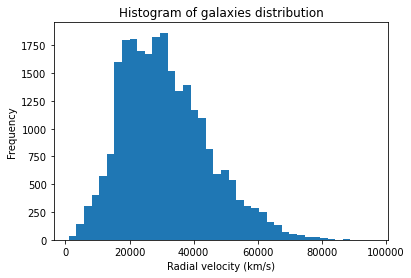

In [6]:
#First of all, it is necessary to turn the cz values into float numbers.
df['cz'] = df['cz'].astype(float)
x_nocut = df['cz']

#Then, the histogram is made.
fig,ax = plt.subplots()
ax.hist(x_nocut, bins=40)
#ax.set_xscale('log')
ax.set_xlabel("Radial velocity (km/s)")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of galaxies distribution")

#logfmt = matplotlib.ticker.LogFormatterExponent(base=10.0, labelOnlyBase=True)
#ax.xaxis.set_major_formatter(logfmt)

plt.show()

### Step 4 - Cutting the sample in a maximum velocity

Now, I will cut the sample in a maximum velocity that includes most of the sample, but that also avoids
the range of velocities where the histogram from the previous item falls off very fast. I will do this because the very fast fall is due to selection effects (we only detect the brighter objects for higher distances). In reality, we would expect the number of galaxies to grow with distance (we are seeing greater volumes of the sky).

I will try to estimate a good cut value just by visual inspection.

In [7]:
#Cut value for the sample.
cut_value = 38000

#Selecting the data according to the cut_value.
df = df[df['cz']<cut_value]
x_cut = df['cz']

#Showing the percentage of data kept after cutting.
print("Percentage of data kept after cutting: "+ str(len(x_cut)/len(x_nocut)))

Percentage of data kept after cutting: 0.7202888257575758


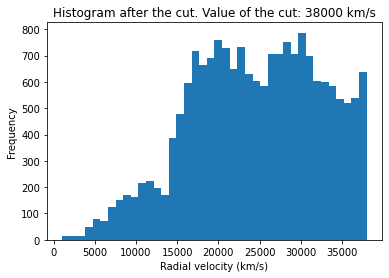

In [8]:
#Making the histogram.
fig,ax = plt.subplots()
ax.hist(x_cut, bins=40)
#ax.set_xscale('log')
ax.set_xlabel("Radial velocity (km/s)")
ax.set_ylabel("Frequency")
ax.set_title("Histogram after the cut. Value of the cut: %.f km/s" %cut_value)

#logfmt = matplotlib.ticker.LogFormatterExponent(base=10.0, labelOnlyBase=True)
#ax.xaxis.set_major_formatter(logfmt)

plt.show()

### Step 5 - Converting the radial velocities into redshift values and then determining the luminosity distance of each galaxy

First, as we have $cz$, to obtain the redshift values we must divide this by $c$.

In [9]:
#Defining the light velocity.
c_m_s = scipy.constants.c
c_km_s = c_m_s/1000

In [10]:
#Calculating and saving the redshift values in a column.
df['z'] = df['cz']/c_km_s

Now, for determining the luminosity distance, we must use the relation $d_L \approx \frac{c}{H_0} z \left ( 1 + \frac{1-q_0}{2} z \right )$, which is valid for $z\ll1$ and for nearly flat universe (see the Barbara Ryden book, Introduction to Cosmology; in second edition, this is the expression (6.31)).

In this expression, $H_0 \equiv \frac{\dot{a}}{a} |_{t=t_0}$ is the Hubble constant and $q_0 \equiv - \left ( \frac{\ddot{a}a}{\dot{a}^2} \right )_{t=t_0}$ is the deceleration parameter. $q_0$ can be also written as $q_0 = \frac{1}{2} \sum_{i=1}^{N} \Omega_{i,0}(1+3w_i)$.  

So, let us define a function to compute $d_L$.

In [11]:
#Defining the function to calculate the luminosity distances.
def d_L(z, H_0, q_0):
    d_L = (c_km_s/H_0)*z*(1+(1-q_0)*z/2) 
    return d_L

Now, let us apply the function to the previous calculated redshift values and save the $d_L$ calculated values in a column in the dataframe.

In [12]:
#Defining the Hubble constant and the deceleration parameter standard values.
H_0_LCDM = 73 #km_s_mpc
q_0_LCDM = -0.6 #Estimated value using the relation between q_0 and \Omega_{i,0}.

#Calculating and saving the values of d_L in the dataframe.
df['d_L'] = d_L(df['z'], H_0_LCDM, q_0_LCDM)

In [13]:
df['d_L']

0        264.129983
2        374.797302
3        377.601262
5        365.623151
6        399.176985
            ...    
25337    446.433828
25338    142.633797
25341    289.944194
25342    176.959203
25343    392.673994
Name: d_L, Length: 18255, dtype: float64

### Step 6 - Determining the distances using simply $\frac{cz}{H_0}$ and comparing with the values from previous item.

Here, I will just divide the $cz$ column by $H_0$ and save the results in a new column in the dataframe, named d_H0. 

In [14]:
#Calculating and saving the values of d_H0 in the dataframe.
df['d_H0'] = df['cz']/H_0_LCDM

Now, I will compare d_H0 with d_L.

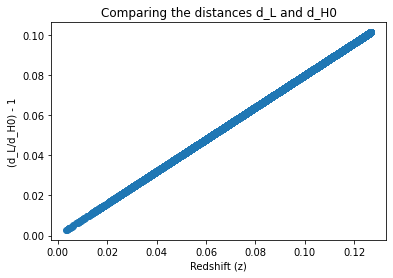

In [15]:
#Comparing the two distances.
diff_distances = df['d_L']/df['d_H0'] - 1

#Making a graph of the comparisson.
fig,ax = plt.subplots()
ax.scatter(df['z'], diff_distances)
#ax.set_xscale('log')
ax.set_xlabel("Redshift (z)")
ax.set_ylabel("(d_L/d_H0) - 1")
ax.set_title("Comparing the distances d_L and d_H0")

#logfmt = matplotlib.ticker.LogFormatterExponent(base=10.0, labelOnlyBase=True)
#ax.xaxis.set_major_formatter(logfmt)

plt.show()

So, as it is possible to see, the difference becomes larger for larger redshifts. This is expected, because for very small z, $d_L \approx \frac{c}{H_0} z \left ( 1 + \frac{1-q_0}{2} z \right )$ becomes just $\frac{cz}{H_0}$. When z grows, the second part in the expression for $d_L$ starts to take effect. 

### Step 7 - Quantifying the effect on the luminosity distances of item 5 of changing the cosmological parameters by 20% for more or for less. 

Let us define the modified parameters.

In [16]:
H_0_up20 = H_0_LCDM*1.2
H_0_down20 = H_0_LCDM*0.8

q_0_up20 = q_0_LCDM*1.2
q_0_down20 = q_0_LCDM*0.8

Now, let us compare d_L for four possibilities: <br>
    1) **H_0_up20 and q_0_LCDM,** <br>
    2) **H_0_down20 and q_0_LCDM,** <br>
    3) **H_0_LCDM and q_0_up20,** <br>
    4) **H_0_LCDM and q_0_down20.**

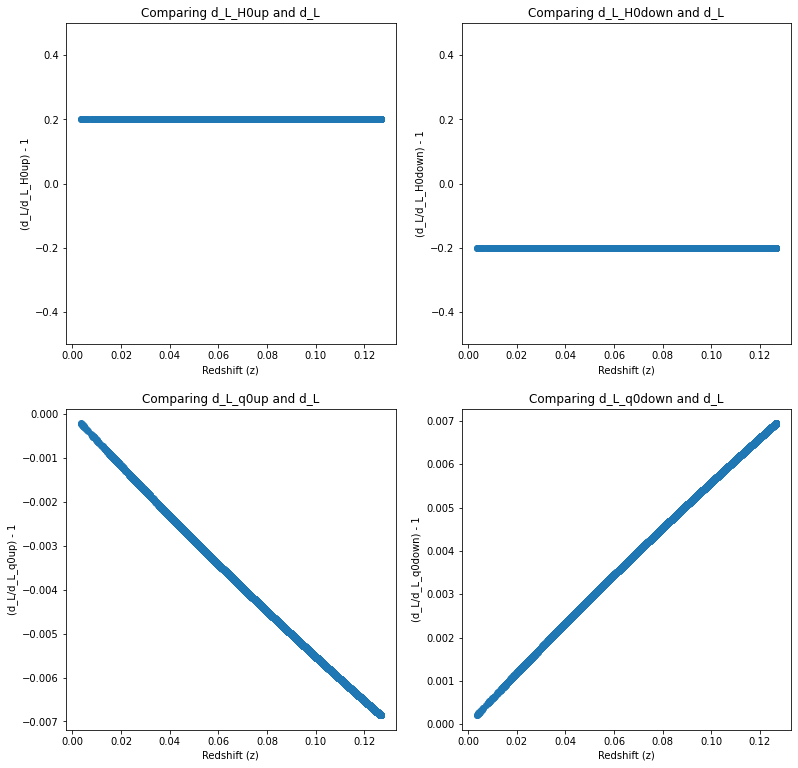

In [17]:
# Initialize the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2, figsize=(13,13))

################################################
### FIRST POSSIBILITY: H_0_up20 and q_0_LCDM ###

#Calculating the new d_L.
d_L_H0up = d_L(df['z'], H_0_up20, q_0_LCDM)

#Comparing d_L_H0up with d_L.
diff_distances = df['d_L']/d_L_H0up - 1

#Plot for the first possibility.
axis[0, 0].scatter(df['z'], diff_distances)
axis[0, 0].set_xlabel("Redshift (z)")
axis[0, 0].set_ylabel("(d_L/d_L_H0up) - 1")
axis[0, 0].set_title("Comparing d_L_H0up and d_L")
axis[0, 0].set_ylim(bottom=-0.5, top=0.5)

###################################################
### SECOND POSSIBILITY: H_0_down20 and q_0_LCDM ###

#Calculating the new d_L.
d_L_H0down = d_L(df['z'], H_0_down20, q_0_LCDM)

#Comparing d_L_H0down with d_L.
diff_distances = df['d_L']/d_L_H0down - 1

#Plot for the second possibility.
axis[0, 1].scatter(df['z'], diff_distances)
axis[0, 1].set_xlabel("Redshift (z)")
axis[0, 1].set_ylabel("(d_L/d_L_H0down) - 1")
axis[0, 1].set_title("Comparing d_L_H0down and d_L")
axis[0, 1].set_ylim(bottom=-0.5, top=0.5)

################################################
### THIRD POSSIBILITY: H_0_LCDM and q_0_up20 ###

#Calculating the new d_L.
d_L_q0up = d_L(df['z'], H_0_LCDM, q_0_up20)

#Comparing d_L_q0up with d_L.
diff_distances = df['d_L']/d_L_q0up - 1

#Plot for the third possibility.
axis[1, 0].scatter(df['z'], diff_distances)
axis[1, 0].set_xlabel("Redshift (z)")
axis[1, 0].set_ylabel("(d_L/d_L_q0up) - 1")
axis[1, 0].set_title("Comparing d_L_q0up and d_L")

##################################################
### FOURTH POSSIBILITY: H_0_LCDM and q_0_down20. ###

#Calculating the new d_L.
d_L_q0down = d_L(df['z'], H_0_LCDM, q_0_down20)

#Comparing d_L_q0down with d_L.
diff_distances = df['d_L']/d_L_q0down - 1

#Plot for the fourth possibility.
axis[1, 1].scatter(df['z'], diff_distances)
axis[1, 1].set_xlabel("Redshift (z)")
axis[1, 1].set_ylabel("(d_L/d_L_q0down) - 1")
axis[1, 1].set_title("Comparing d_L_q0down and d_L")



plt.show()

So, as we can see, a change of 20% in $H_0$ leads to a systematic error of also 20% in d_L. However, a change of 20% in $q_0$ doesn't lead to a considerable error in d_L, at least in the range of redshifts that we are working with (small redshifts).

### Step 8 - Making a histogram of the luminosity distance distribution given in item 5 (in Mpc)

Now, let us make a histogram of the luminosity distance distribution.

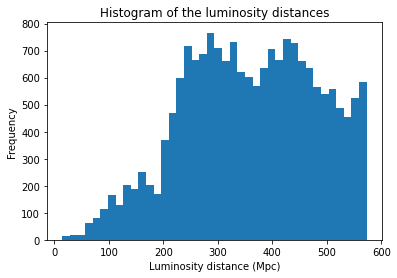

In [18]:
#Making the histogram.
fig,ax = plt.subplots()
ax.hist(df['d_L'], bins=40)
#ax.set_xscale('log')
ax.set_xlabel("Luminosity distance (Mpc)")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of the luminosity distances")

#logfmt = matplotlib.ticker.LogFormatterExponent(base=10.0, labelOnlyBase=True)
#ax.xaxis.set_major_formatter(logfmt)

plt.show()

### Step 9 - Determining absolute magnitudes from the luminosity distances and from the apparent magnitudes.

The relation between absolute magnitude, apparent magnitude and luminosity distance is given by $M = m -5log_{10} \left(\frac{d_L}{1 Mpc}\right) - 25$ (see the Barbara Ryden's book, Introduction to Cosmology; in second edition, this is the expression (6.48)).

Assuming that the apparent magnitudes are corrected for extinction and for redshift, we can just apply the above relation.

In [19]:
#Converting the mag values into float.
df['mag'] = df['mag'].astype(float)

#Calculating and saving the absolute magnitudes in the dataframe.
df['M'] = df['mag'] - 5*np.log10(df['d_L']) - 25

### Step 10 - Making a histogram with the distribution of absolute magnitudes.

Now, let us make a histogram of the absolute magnitudes distribution.

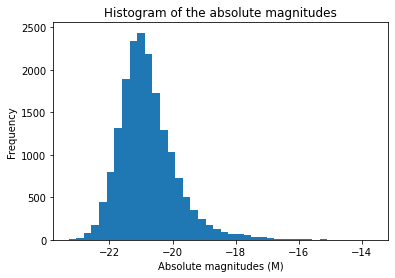

In [20]:
#Making the histogram.
fig,ax = plt.subplots()
ax.hist(df['M'], bins=40)
#ax.set_xscale('log')
ax.set_xlabel("Absolute magnitudes (M)")
ax.set_ylabel("Frequency")
ax.set_title("Histogram of the absolute magnitudes")

#logfmt = matplotlib.ticker.LogFormatterExponent(base=10.0, labelOnlyBase=True)
#ax.xaxis.set_major_formatter(logfmt)

plt.show()

This histogram doesn't represent the luminosity function yet. The Malmquist bias (intrinsically bright objects have preferential detection) leads to a overrepresentation of galaxies with greater luminosity. As we can see, in the above histogram, this bias is present, so it doesn't represent the galaxies distribution by luminosity in a unitary 
volume of space.

## PART 2 - Steps 11 to 14

### Step 11 -  Determining the range of luminosity distances ([minimum,maximum]) within which each galaxy may be and still make into the LCRS sample.

As you can see in the article THE DEPENDENCE OF THE GALAXY LUMINOSITY FUNCTION ON ENVIRONMENT, by DANIEL CHRISTLEIN (https://iopscience.iop.org/article/10.1086/317797/pdf), the LCRS have upper and lower apparent magnitude limits of $m_{up}$ = 15 and $m_{lo}$ = 17.7. So, given a certain galaxy of absolute magnitude M, it is possible to calculate the minimum and maximum distances that this galaxy could be and still make into the LCRS sample. 

For doing this, we could begin with the relation $M = m -5log_{10} \left(\frac{d_L}{1 Mpc}\right) - 25$. Inverting this relation to isolate $d_L$, we obtain $\frac{d_L}{1 Mpc} = 10^{0.2(m-M-25)}$.

Now, we can put $m_{up}$ (or $m_{lo}$) in place of m, to obtain $d_{min}$ and $d_{max}$ for each galaxy. 

If we want the relation in terms of $m_{gal}$ (apparent magnitude of the galaxy), we must substitute M in the above relation by $m_{gal} - 5log_{10}\left(\frac{d_{Lgal}}{1 Mpc}\right) - 25$. This leads to $d_{min}=d_{Lgal}10^{0.2(m_{up} - m_{gal})}$ and $d_{max}=d_{Lgal}10^{0.2(m_{lo} - m_{gal})}$, where $d_{min}$ and $d_{max}$ are measured in Mpc.

So, let us do it.

In [21]:
#Defining the magnitude limits of the survey.
m_up = 15
m_lo = 17.7

#Calculating d_min and d_max and saving into the dataframe.
df['d_min'] = df['d_L']*10**(0.2*(m_up - df['mag']))

df['d_max'] = df['d_L']*10**(0.2*(m_lo - df['mag']))

### Step 12 - Determining the maximum volume per unit solid angle available for each galaxy

Now, we have to associate to each galaxy a certain volume  $V_{max}$, which is the volume available for the galaxy (the galaxy could have been anywhere inside the volume). This will be used in the next step for the $V_{max}$ method, a method for estimating the luminosity function.

For doing this, take the volume of a sphere, $V = \frac{4}{3} \pi r^3$. Now, remember that we would only see the galaxy if it were at a distance between $d_{min}$ and $d_{max}$ in this survey. So, the volume available for the galaxy is $V = \frac{4}{3} \pi (d_{max}^3 - d_{min}^3)$. If we want this quantity per unit solid angle, we must divide by $4\pi$, so $V_{max} = \frac{1}{3} (d_{max}^3 - d_{min}^3)$. 

Let us do it.

In [22]:
#Calculating 1/V_max and saving into the dataframe.
df['1/V_max'] = 1/((1/3)*(df['d_max']**3 - df['d_min']**3)) #1/(Mpc^3/sterad)

df

,field,p,mag,scan,mc,RAh,RAm,RAs,DEd,DEm,...,sf,gsf,cz55,z,d_L,d_H0,M,d_min,d_max,1/V_max
0,0000-42E,631.0,16.48,0000-4122,17.33,00,08,48.00,-41,28,...,0.251,0.232,None,0.061309,264.129983,251.780822,-20.629089,133.603459,463.252426,3.091812e-08
2,0000-42E,519.0,16.81,0000-4225,17.68,00,08,49.48,-42,26,...,0.265,0.298,None,0.085426,374.797302,350.821918,-21.058982,162.853260,564.672264,1.707170e-08
3,0000-42E,552.0,17.03,0000-4237,17.72,00,09,01.26,-42,33,...,0.259,0.348,None,0.086026,377.601262,353.287671,-20.855167,148.263223,514.083231,2.262382e-08
5,0000-42E,606.0,16.59,0000-4225,17.68,00,09,18.78,-42,31,...,0.277,0.368,None,0.083458,365.623151,342.739726,-21.225168,175.805998,609.584180,1.356954e-08
6,0000-42E,554.0,17.12,0000-4147,17.64,00,09,20.56,-41,43,...,0.264,0.558,None,0.090629,399.176985,372.191781,-20.885827,150.371487,521.393356,2.168552e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25337,2355-45W,320.0,17.56,2355-4422,18.40,23,56,43.07,-44,18,...,0.684,0.616,None,0.100610,446.433828,413.178082,-20.688785,137.327368,476.164590,2.847049e-08
25338,2355-45W,326.0,16.11,2355-4435,16.88,23,56,58.37,-44,38,...,0.651,0.550,None,0.033817,142.633797,138.876712,-19.661112,85.550479,296.635035,1.177603e-07
25341,2355-45W,339.0,17.45,2355-4512,18.35,23,57,24.12,-45,12,...,0.651,0.754,None,0.067010,289.944194,275.191781,-19.861572,93.824102,325.322736,8.927359e-08
25342,2355-45W,346.0,16.56,2355-4435,18.22,23,57,38.90,-44,32,...,0.685,0.555,None,0.041699,176.959203,171.246575,-19.679366,86.272653,299.139080,1.148277e-07


The weight for each galaxy, $\frac{1}{V_{max}}$, will be used in the next step.

### Step 13 - Making a graph with the distribution of galaxies as a function of absolute magnitude by now using the weights ($\frac{1}{V_{}max}$) assigned to them

There is a method, called the $V_{max}$ method, used to estimate the luminosity function of galaxies. The idea of this method is to assign to each galaxy a certain weight, given by $\frac{1}{V_{max}}$, where $V_{max}$ was presented in the last step. Doing this, we favor the galaxies with small $V_{max}$.

As we can see in the graph below, the galaxies with small $V_{max}$, favored by the weights, are exactly the galaxies with low absolute magnitudes (when I say "low", I mean "more positive" absolute magnitudes, or, equivalently, fainter galaxies) which are disfavored by the Malmquist bias. So, this is a method that compensates this bias, then it estimates more realistically the luminosity function.

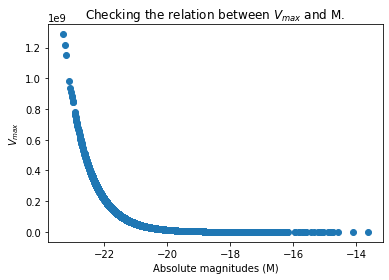

In [23]:
#Making a graph for showing that galaxies with small V_max are galaxies with low absolute magnitudes.
fig,ax = plt.subplots()
ax.scatter(df['M'], 1/df['1/V_max'])
ax.set_xlabel("Absolute magnitudes (M)")
ax.set_ylabel("$V_{max}$")
ax.set_title("Checking the relation between $V_{max}$ and M.")

plt.show()

With this in mind, we can write the relation $\Phi(M) dM = \sum \left(\frac{1}{V_{max}}\right)$. This gives, for a certain range of absolute magnitudes $[M, M+dM]$, the number of galaxies per $Mpc^3$ per sterad. If we want $\Phi(M)$ (luminosity function in number of galaxies per $Mpc^3$ per sterad per unit magnitude), we just divide by the bin size $dM$.

Aiming to apply the above relation and obtain the luminosity function, I will first bin the data.

In [24]:
#Binning the data.
nbins = 30 #Number of bins.

df['BINS'] = pd.cut(df["M"], nbins)

#Obtaining the bin size.
bin_size = df['BINS'][0].right - df['BINS'][0].left

#Saving also the middle value of the bin in the dataframe.
#This will be useful for making the luminosity function graph.
df['BINS_MID'] = [(a.left + a.right)/2 for a in df['BINS']]

print("Bin size = "+ str(bin_size))

Bin size = 0.3219999999999992


Now, I will group the data of each bin. 

In [25]:
bin_groups = df.groupby(df['BINS'])
#list(bin_groups.groups)

Then, I will sum the values of $\frac{1}{V_{max}}$ in each bin and divide by the bin size.

In [26]:
y = bin_groups['1/V_max'].sum()/bin_size
#y

Now, I will make the plot of the luminosity function.

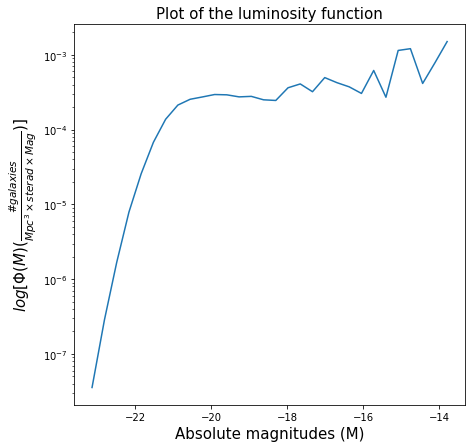

In [27]:
#Making a bar graph with pandas.
#x.plot(kind='bar')

#Setting the title and label sizes.
plt.rc('axes', titlesize=15, labelsize=15) 

#Plotting with matplotlib.
fig,ax = plt.subplots(figsize=(7,7))
ax.plot(bin_groups['BINS_MID'].mean(), y)
ax.set_yscale('log')
ax.set_xlabel("Absolute magnitudes (M)")
ax.set_ylabel('$log[ \Phi(M) (\\frac{\# galaxies}{Mpc^{3} \\times sterad \\times Mag})] $')
ax.set_title("Plot of the luminosity function")

#logfmt = matplotlib.ticker.LogFormatterExponent(base=10.0, labelOnlyBase=True)
#ax.yaxis.set_major_formatter(logfmt)

plt.show()

### Step 14 - Comparing the result with figure 7 of the paper Spectral classification and luminosity function of galaxies in the Las Campanas Redshift Survey, Bromley et al. 1998, ApJ, 505, 25.

The figure of the article is shown below.

![title](artimg.png)

As we can see, the shape of the curve obtained is very simillar to that of the article. The values in the y-axis are different, probably because of the diffence of units and some normalization.

We can also see that, in both graphs, there is an increased uncertainty in the determination of the 'faint-end' slope. 

There are also other methods for determining the luminosity function, with higher precision. Using other method, we could maybe obtain an even better result.